In [1]:
#importing the neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import graphviz

In [2]:
#Loading the dataset
df = pd.read_csv('/content/breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.shape

(569, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
#splitting the dataset
y=df[['diagnosis']]
x=df.drop(columns=['diagnosis','id'],axis=1)

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=33)

In [9]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
dt=DecisionTreeClassifier()
model=dt.fit(x_train,y_train)
model.score(x_test,y_test)

0.9298245614035088

In [11]:
a=list(df.iloc[175])
b=a[2:]
b

[8.671,
 14.45,
 54.42,
 227.2,
 0.09138,
 0.04276,
 0.0,
 0.0,
 0.1722,
 0.06724,
 0.2204,
 0.7873,
 1.435,
 11.36,
 0.009172,
 0.008007,
 0.0,
 0.0,
 0.02711,
 0.003399,
 9.262,
 17.04,
 58.36,
 259.2,
 0.1162,
 0.07057,
 0.0,
 0.0,
 0.2592,
 0.07848]

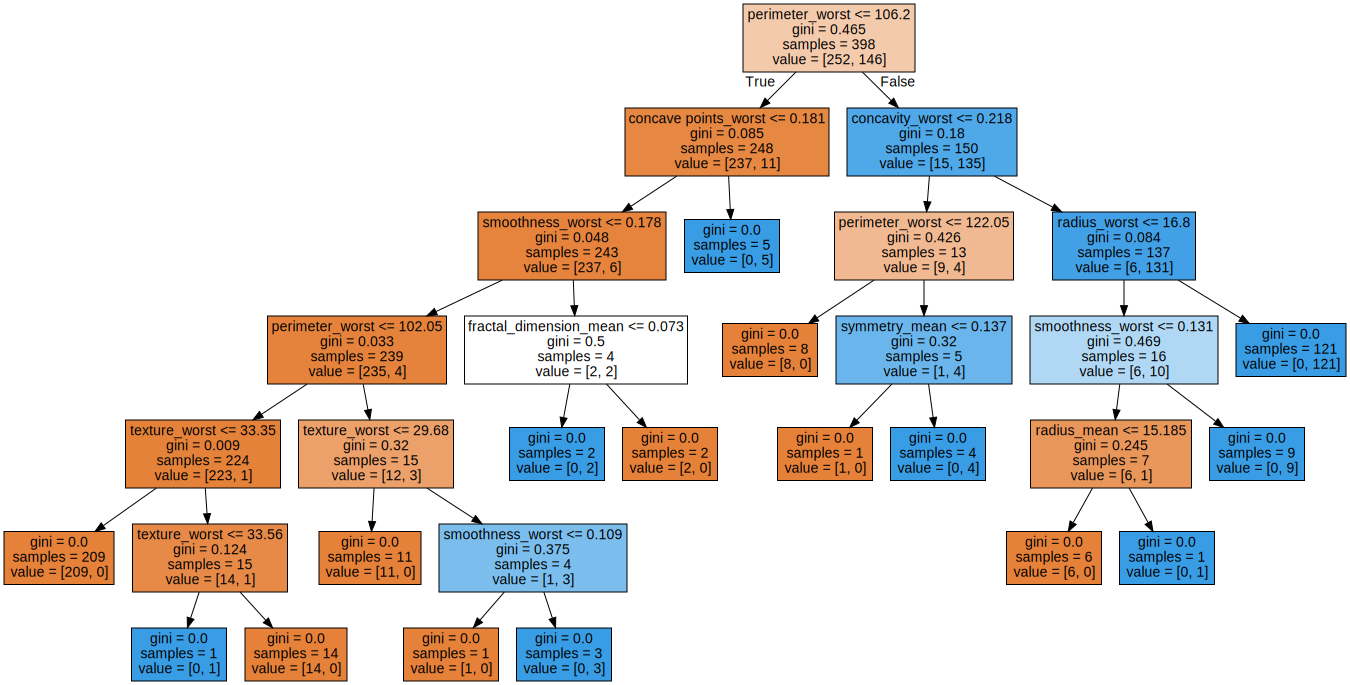

In [12]:
dot=export_graphviz(model,feature_names=x.columns,filled=True)
image=graphviz.Source(dot)
image

In [13]:
rf=RandomForestClassifier(n_estimators=400,max_depth=4,criterion="entropy")
model2=rf.fit(x_train,y_train)
model2.score(x_test,y_test)

0.9532163742690059

In [14]:
#saving the random forest model
import pickle
pickle.dump(model2,open('model.pkl','wb'))